In [6]:
import os
import csv
import matplotlib.pyplot as plt

In [7]:
def findDuration(printTrace):
    mesure = 1
    with open("profile", newline="") as csvfile:
        reader = csv.reader(csvfile, delimiter=",")
        tempsTotal = 0
        i = 0
        for row in reader:
            if (i == 4):
                if (row[1] == "ms"):
                    mesure = 1000
            if (i >= 5):
                tempsTotal += float(row[1]) * mesure
                if (printTrace):
                    print(row[1], "->", row[18])
            i += 1
        return tempsTotal


In [11]:
os.system("nvcc main.cu histogramGPU.cu histogramCPU.cpp utils/chronoCPU.cpp utils/chronoGPU.cu utils/image.cpp -O3 -o main")
os.system("nvprof --csv --print-gpu-trace --log-file profile ./main -N 4 -b 128 -i ./images/batiment-1.jpg")
findDuration(True)

62.624000 -> [CUDA memcpy HtoD]
19.328000 -> rgb2hsv(unsigned char*, int, float*, float*, int*)
20.704000 -> histogramShared(int*, int*, int, unsigned int)
7.169000 -> repart(int*, int*)
2.720000 -> [CUDA memcpy DtoD]
8.031000 -> equalization(int*, int*, float*, int)
14.880000 -> hsv2rgb(unsigned char*, int, float*, float*, float*)
59.136000 -> [CUDA memcpy DtoH]
78.496000 -> [CUDA memcpy DtoH]


273.088

In [12]:
with open("profile", newline="") as csvfile:
    reader = csv.reader(csvfile, delimiter=",")
    i = 0
    tempsTotal = 0 
    for row in reader:
        if (i >= 5):
            tempsTotal += float(row[1])
            print(row[1], "->", row[18])
        i += 1
    print("Temps total", tempsTotal)

62.624000 -> [CUDA memcpy HtoD]
19.328000 -> rgb2hsv(unsigned char*, int, float*, float*, int*)
20.704000 -> histogramShared(int*, int*, int, unsigned int)
7.169000 -> repart(int*, int*)
2.720000 -> [CUDA memcpy DtoD]
8.031000 -> equalization(int*, int*, float*, int)
14.880000 -> hsv2rgb(unsigned char*, int, float*, float*, float*)
59.136000 -> [CUDA memcpy DtoH]
78.496000 -> [CUDA memcpy DtoH]
Temps total 273.088


[268.928, 269.78799999999995, 271.709, 272.54200000000003, 273.756, 281.918, 282.4, 292.255]


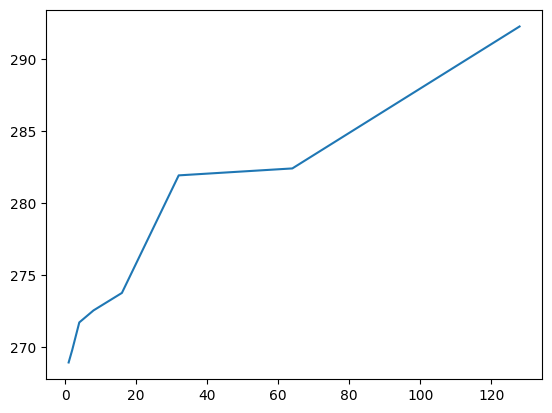

In [17]:
N = [1,2,4,8,16,32,64,128]
durations = []
for n in N:
    os.system("nvprof --csv --print-gpu-trace --log-file profile ./main -N " + str(n) + " -b 128 -i ./images/batiment-1.jpg")
    durations.append(findDuration(False))
print(durations)
plt.plot(N,durations)
plt.show()

#Meilleure valeur N = 4

[482.93999999999994, 343.58000000000004, 286.333, 275.326, 265.502, 266.751, 273.214]


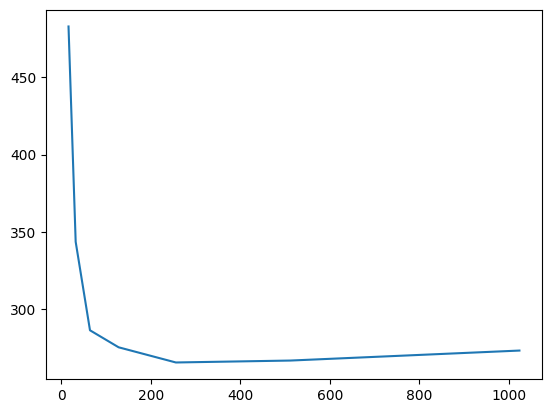

In [18]:
B = [16,32,64,128, 256, 512, 1024]
durations = []
for b in B:
    os.system("nvprof --csv --print-gpu-trace --log-file profile ./main -N 4 -b " + str(b) + " -i ./images/batiment-1.jpg") # On utilise -N avec 4 car ce sont les meilleurs résultats
    durations.append(findDuration(False))
print(durations)
plt.plot(B,durations)
plt.show()
#Meilleure valeur b = 128

[271.485, 708.059, 1065.11, 1456.853, 2443.117]


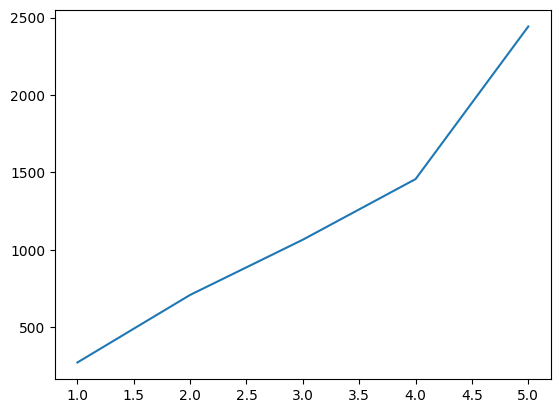

In [20]:
I = [1, 2, 3, 4, 5]
durations = []
for i in I:
    os.system("nvprof --csv --print-gpu-trace --log-file profile ./main -N 4 -b 128 -i ./images/batiment-" + str(i) + ".jpg") # On utilise -N avec 4 car ce sont les meilleurs résultats
    durations.append(findDuration(False))
print(durations)
plt.plot(I,durations)
plt.show()